In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from CauseML.utilities import random_covar_matrix

## Method Code
```python
def random_covar_matrix(d,k):
    """
    Generate random covariance matrix by approximating the random
    vine method.
    """
    if k >= d:
        raise Exception("Invalid params: k >= d")

    W = np.random.normal(loc=0, scale=1, size=(d, k))
    S = W@W.T + np.diag(np.random.random(d))
    S = np.diag(1./np.sqrt(np.diag(S))) @ S @ np.diag(1./np.sqrt(np.diag(S)))

    return S
```

## Explanation

https://stats.stackexchange.com/questions/2746/
    how-to-efficiently-generate-random-positive-semidefinite-correlation-matrices

In [35]:
def plot_random_covar(dimension=50, correlation_deg=1):
    plt.figure(figsize=(14, 6))
    cm = random_covar_matrix(dimension, correlation_deg)
    plt.subplot(131)
    plt.title("Pair-wise correlation heatmap")
    plt.imshow(cm)

    plt.subplot(132)
    plt.xlim((-1, 1))
    plt.title("Pair-wise correlation values distribution")
    plt.hist(cm.flatten())

    plt.subplot(133)
    plt.title("Eigenvalues")
    e_vals = np.linalg.eig(cm)[0]
    plt.scatter(range(len(e_vals)), e_vals)
    plt.show()

48


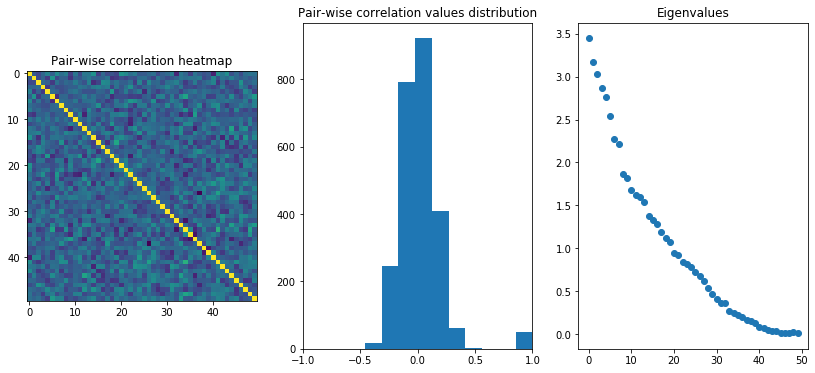

In [36]:
plot_random_covar(dimension=50, correlation_deg=0.025)

20


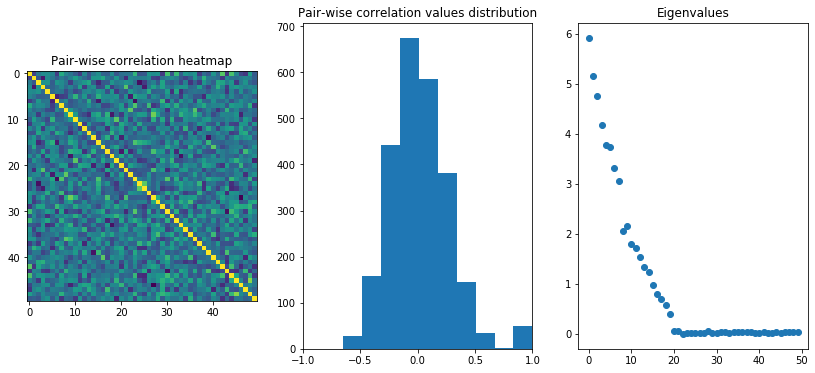

In [39]:
plot_random_covar(dimension=50, correlation_deg=0.6)

1


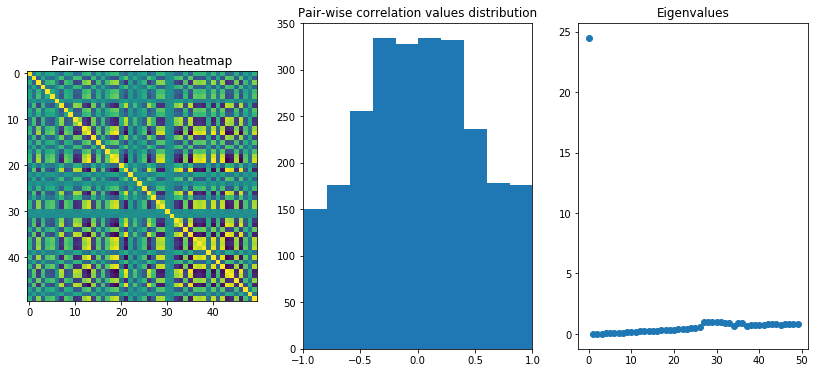

In [38]:
plot_random_covar(dimension=50, correlation_deg=0.975)

## Test Generated Data

In [50]:
from CauseML.data_sources import load_random_normal_covariates
import pandas as pd

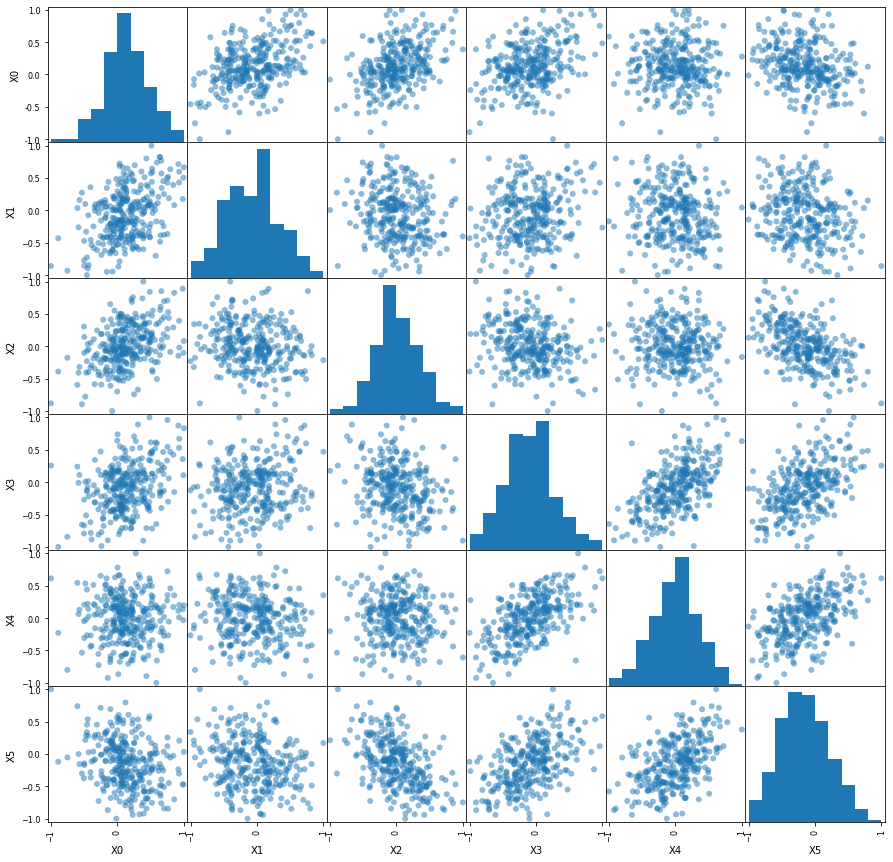

In [69]:
ds = load_random_normal_covariates(
    n_covars=6,
    n_observations=300,
    partial_correlation_degree=0.025)

pd.plotting.scatter_matrix(ds.original_covariate_data, figsize=(15, 15), marker='o')
plt.show()

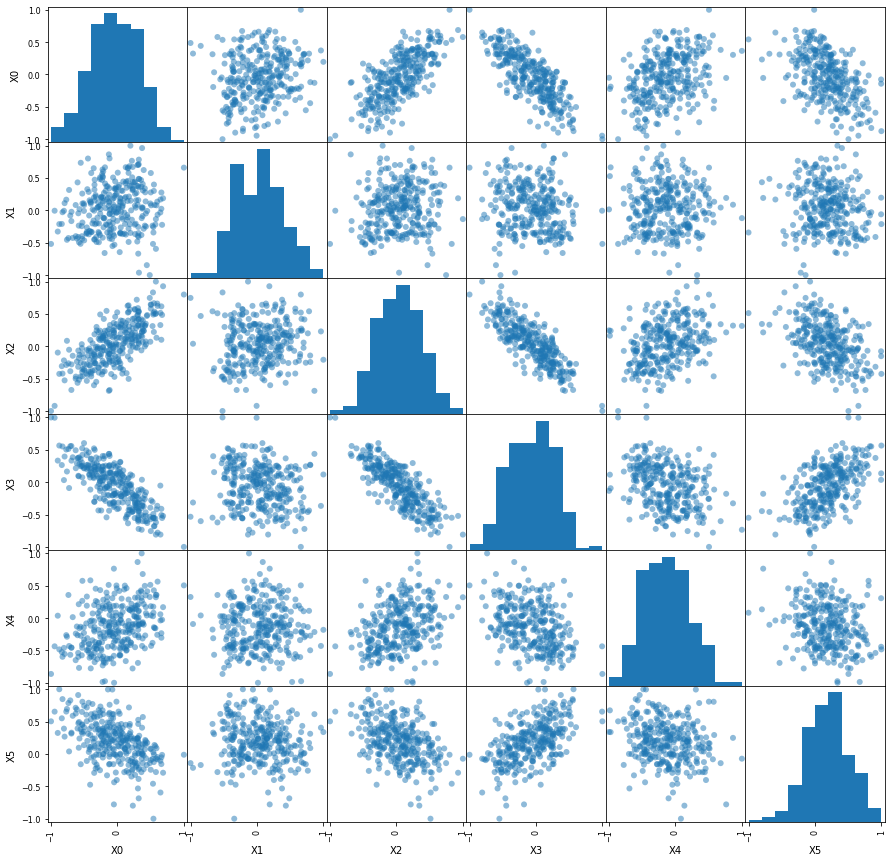

In [68]:
ds = load_random_normal_covariates(
    n_covars=6,
    n_observations=300,
    partial_correlation_degree=0.925)

pd.plotting.scatter_matrix(ds.original_covariate_data, figsize=(15, 15), marker='o')
plt.show()